In [1]:
!pip install split-folders
!pip install matplotlib

import numpy
import pandas as pd
import matplotlib.pyplot as plt
import os
import splitfolders

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Defaulting to user installation because normal site-packages is not writeable
  Using cached matplotlib-3.9.1-cp310-cp310-win_amd64.whl (8.0 MB)
  Using cached contourpy-1.2.1-cp310-cp310-win_amd64.whl (187 kB)



[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
df=pd.read_csv('data/archive (1)/driver_imgs_list.csv')
df.head()

,subject,classname,img
0,p002,c0,img_44733.jpg
1,p002,c0,img_72999.jpg
2,p002,c0,img_25094.jpg
3,p002,c0,img_69092.jpg
4,p002,c0,img_92629.jpg


In [3]:
data_dir="data/archive (1)/imgs/train"
splitfolders.ratio(data_dir,output="output",seed=1337,ratio=(.8,.2),group_prefix=None,move=False)

Copying files: 1785 files [00:01, 1098.60 files/s]


In [1]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [3]:
batch_size=32
datagen=ImageDataGenerator(rescale=1/255,
                           zoom_range=0.05,
                           width_shift_range=0.05,
                           height_shift_range=0.05,
                           shear_range=0.05,
                           fill_mode='nearest'
                           )

train=datagen.flow_from_directory('output/train',
                                  target_size=(256,256),
                                  batch_size=batch_size)

val_gen=ImageDataGenerator(rescale=1/255)
val=val_gen.flow_from_directory('output/val',
                               target_size=(256,256),
                               batch_size=batch_size)

for data_batch,labels_batch in train:
    print('data batch shape:',data_batch.shape)
    print('labels batch shape:',labels_batch.shape)
    break

from tensorflow.keras.applications.vgg16 import preprocess_input

batch_size=32
datagen=ImageDataGenerator(preprocessing_function=preprocess_input,
                           zoom_range=0.05,
                           width_shift_range=0.05,
                           height_shift_range=0.05,
                           shear_range=0.05,
                           fill_mode='nearest'
                           )

train=datagen.flow_from_directory('output/train',
                                  target_size=(256,256),
                                  batch_size=batch_size)

val_gen=ImageDataGenerator(preprocessing_function=preprocess_input)
val=val_gen.flow_from_directory('output/val',
                               target_size=(256,256),
                               batch_size=batch_size)



Found 1420 images belonging to 11 classes.
Found 365 images belonging to 11 classes.
data batch shape: (32, 256, 256, 3)
labels batch shape: (32, 11)
Found 1420 images belonging to 11 classes.
Found 365 images belonging to 11 classes.


In [7]:
from tensorflow.keras.applications import VGG16
import os

# Make sure to set the correct path to the downloaded weights file
weights_path = os.path.join('vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5')

if not os.path.exists(weights_path):
    raise ValueError(f"File not found: {weights_path}")

conv_base = VGG16(weights=weights_path,
                  include_top=False,
                  input_shape=(256,256,3))
conv_base.summary()


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [11]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16
import os

# Specify the correct path to the downloaded weights file
weights_path = 'vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5'

if not os.path.exists(weights_path):
    raise ValueError(f"File not found: {weights_path}")

# Load the VGG16 model
conv_base = VGG16(weights=weights_path, include_top=False, input_shape=(256, 256, 3))
conv_base.summary()

# Freeze the convolutional base
conv_base.trainable = False

# Print the shape of the output of the conv_base
print("Shape of conv_base output:", conv_base.output_shape)

# Build the model
model_DL = models.Sequential()
model_DL.add(conv_base)
model_DL.add(layers.Flatten())
model_DL.add(layers.Dense(512, activation='relu'))
model_DL.add(layers.Dropout(0.35))
model_DL.add(layers.Dense(128, activation='relu'))
model_DL.add(layers.Dropout(0.35))
model_DL.add(layers.Dense(32, activation='relu'))
model_DL.add(layers.Dense(11, activation='softmax'))

# Print the model summary to debug
model_DL.summary()


Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)           │ (None, 256, 256, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 256, 256, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 256, 256, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 128, 128, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 128, 128, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 128, 128, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 64, 64, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 64, 64, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 64, 64, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 32, 32, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 32, 32, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 32, 32, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 16, 16, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 16, 16, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 8, 8, 512)           │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

Shape of conv_base output: (None, 8, 8, 512)


ValueError: Undefined shapes are not supported.

Found 1420 images belonging to 11 classes.
Found 365 images belonging to 11 classes.
Epoch 1/10


C:\Users\sidda\AppData\Roaming\Python\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


45/45 ━━━━━━━━━━━━━━━━━━━━ 407s 9s/step - accuracy: 0.2739 - loss: 2.1490 - val_accuracy: 0.4192 - val_loss: 1.7789
Epoch 2/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 379s 8s/step - accuracy: 0.3453 - loss: 1.8457 - val_accuracy: 0.5233 - val_loss: 1.6841
Epoch 3/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 383s 9s/step - accuracy: 0.3752 - loss: 1.7238 - val_accuracy: 0.5151 - val_loss: 1.5639
Epoch 4/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 357s 8s/step - accuracy: 0.4444 - loss: 1.6385 - val_accuracy: 0.6137 - val_loss: 1.3579
Epoch 5/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 333s 7s/step - accuracy: 0.4800 - loss: 1.4859 - val_accuracy: 0.7178 - val_loss: 1.2078
Epoch 6/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 526s 12s/step - accuracy: 0.5416 - loss: 1.3493 - val_accuracy: 0.8247 - val_loss: 0.9555
Epoch 7/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 165s 4s/step - accuracy: 0.5830 - loss: 1.2224 - val_accuracy: 0.8247 - val_loss: 0.8387
Epoch 8/10
45/45 ━━━━━━━━━━━━━━━━━━━━ 165s 4s/step - accuracy: 0.6604 - loss: 1.0241 - val_accuracy: 0.8384 - val_loss: 0

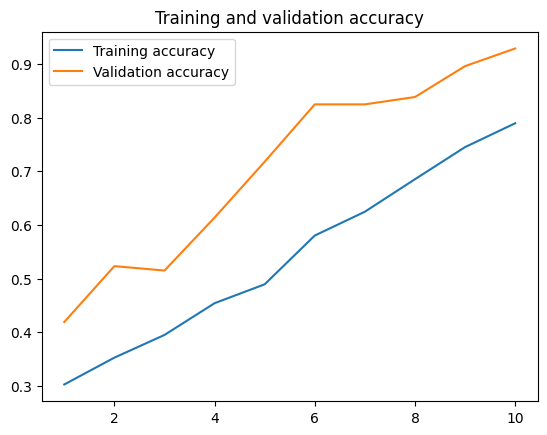

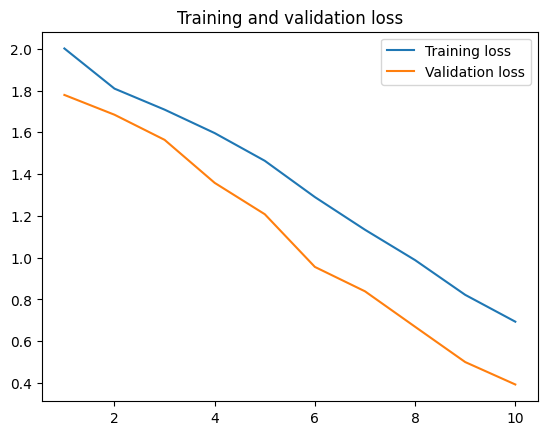

Found 0 images belonging to 1 classes.


ValueError: Must provide at least one structure

In [4]:
from tensorflow.keras import models, layers, optimizers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
import os

# Ensure that your data generators are properly defined
batch_size = 32

datagen = ImageDataGenerator(rescale=1/255,
                             zoom_range=0.05,
                             width_shift_range=0.05,
                             height_shift_range=0.05,
                             shear_range=0.05,
                             fill_mode='nearest')

train = datagen.flow_from_directory('output/train',
                                    target_size=(256, 256),
                                    batch_size=batch_size)

val_gen = ImageDataGenerator(rescale=1/255)
val = val_gen.flow_from_directory('output/val',
                                  target_size=(256, 256),
                                  batch_size=batch_size)

# Define the VGG16 convolutional base
conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(256, 256, 3))

# Freeze the convolutional base
conv_base.trainable = False

# Define and compile the model
model_DL = models.Sequential()
model_DL.add(conv_base)
model_DL.add(layers.Flatten())
model_DL.add(layers.Dense(512, activation='relu'))
model_DL.add(layers.Dropout(0.35))
model_DL.add(layers.Dense(128, activation='relu'))
model_DL.add(layers.Dropout(0.35))
model_DL.add(layers.Dense(32, activation='relu'))
model_DL.add(layers.Dense(11, activation='softmax'))

model_DL.compile(loss='categorical_crossentropy',
                 optimizer=optimizers.Adam(learning_rate=0.0001),
                 metrics=['accuracy'])

# Train the model using the data generators
history = model_DL.fit(train,  # Pass the training data generator
                       epochs=10,
                       validation_data=val)  # Pass the validation data generator

# Plotting training and validation accuracy and loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, label='Training accuracy')
plt.plot(epochs, val_acc, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

plt.plot(epochs, loss, label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Testing and prediction
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test = test_datagen.flow_from_directory('output/test',
                                        classes=['test'],
                                        batch_size=20,
                                        shuffle=False,
                                        target_size=(256, 256),
                                        class_mode=None)

Predict = model_DL.predict(test)


In [13]:
!pip install gradio

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/12.4 MB ? eta -:--:--
     ---------------------------------------- 0.0/12.4 MB ? eta -:--:--
     ---------------------------------------- 0.1/12.4 MB 1.3 MB/s eta 0:00:10
      --------------------------------------- 0.3/12.4 MB 2.3 MB/s eta 0:00:06
     - -------------------------------------- 0.5/12.4 MB 2.9 MB/s eta 0:00:05
     -- ------------------------------------- 0.8/12.4 MB 3.6 MB/s eta 0:00:04
     --- ------------------------------------ 1.1/12.4 MB 4.2 MB/s eta 0:00:03
     ---- ----------------------------------- 1.5/12.4 MB 4.7 MB/s eta 0:00:03
     ----- ---------------------------------- 1.8/12.4 MB 5.1 MB/s eta 0:00:03
     ------ --------------------------------- 2.1/12.4 MB 5.2 MB/s eta 0:00:02
     ------- -------------------------------- 2.5/12.4 MB 5.4 MB/s eta 0:00:02
     --------- ------------------------------ 2.8/12.4 MB 5.6 MB/s 


[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [20]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
     ---------------------------------------- 0.0/38.8 MB 1.4 MB/s eta 0:00:29
     ---------------------------------------- 0.1/38.8 MB 1.3 MB/s eta 0:00:30
     ---------------------------------------- 0.2/38.8 MB 1.6 MB/s eta 0:00:25
     ---------------------------------------- 0.3/38.8 MB 1.8 MB/s eta 0:00:22
      --------------------------------------- 0.6/38.8 MB 2.5 MB/s eta 0:00:16
      --------------------------------------- 0.9/38.8 MB 3.5 MB/s eta 0:00:11
     - -------------------------------------- 1.1/38.8 MB 3.5 MB/s eta 0:00:11
     - -------------------------------------- 1.3/38.8 MB 3.5 MB/s eta 0:00:11
     - -------------------------------------- 1.5/38.8 MB 3.7 MB/s eta 0:00:11
     - -------------------------------------- 1.8/38.8 MB 4.0 MB/s eta 0:00:10
     -- ------------------------------------- 2.1/38.8 MB 4.


[notice] A new release of pip is available: 23.0.1 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import gradio as gr
import cv2
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
from tensorflow.keras import optimizers
from gtts import gTTS
import tempfile

class_labels = {
    0: "not distracted - safe driving",
    1: "manual distraction - mobile usage",
    2: "manual distraction - mobile usage",
    3: "manual distraction - mobile usage",
    4: "manual distraction - mobile usage",
    5: "manual distraction - controlling infotainment",
    6: "manual distraction",
    7: "cognitive distraction",
    8: "manual distraction",
    9: "cognitive distraction",
    10: "not distracted - safe driving"
}

def generate_alert(text):
    tts = gTTS(text=text, lang='en')
    with tempfile.NamedTemporaryFile(delete=False, suffix=".mp3") as fp:
        temp_path = fp.name
        tts.save(temp_path)
    return temp_path

def process_image(image):
    img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img, (256, 256))
    img_preprocessed = preprocess_input(np.array(img_resized).astype('float32'))
    img_batch = np.expand_dims(img_preprocessed, axis=0)

    # Define and load the model
    conv_base = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

    model_DL = Sequential()
    model_DL.add(conv_base)
    model_DL.add(Flatten())
    model_DL.add(Dense(512, activation='relu'))
    model_DL.add(Dropout(0.35))
    model_DL.add(Dense(128, activation='relu'))
    model_DL.add(Dropout(0.35))
    model_DL.add(Dense(32, activation='relu'))
    model_DL.add(Dense(11, activation='softmax'))  # Ensure there are 11 classes

    model_DL.compile(loss='categorical_crossentropy',
                     optimizer=optimizers.Adam(learning_rate=0.0001),
                     metrics=['accuracy'])

    
    predictions = model_DL.predict(img_batch)

    predicted_class = np.argmax(predictions, axis=1)[0]

    predicted_label = class_labels[predicted_class]
    print("Predicted class:", predicted_class)
    print("Predicted label:", predicted_label)

    if predicted_class == 0 or predicted_class == 10:
        frame_color = (0, 255, 0)  # Green for safe driving
    else:
        frame_color = (255, 0, 0)  # Red for distracted driving

    img_with_frame = cv2.rectangle(img_resized, (0, 0), (255, 255), frame_color, 10)

    audio_filename = generate_alert(predicted_label)

    return img_with_frame, predicted_label, audio_filename

iface = gr.Interface(
    fn=process_image,
    inputs=gr.components.Image(type="numpy", label="Upload or Capture Image"),
    outputs=[
        gr.components.Image(type="numpy", label="Processed Image"),
        gr.components.Textbox(label="Predicted Label"),
        gr.components.Audio(label="Audio Alert")
    ]
)

# Launch the interface
iface.launch()


Running on local URL:  http://127.0.0.1:7860

To create a public link, set `share=True` in `launch()`.


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted class: 0
Predicted label: not distracted - safe driving
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted class: 2
Predicted label: manual distraction - mobile usage
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted class: 0
Predicted label: not distracted - safe driving
